In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('humans_experiment1.csv')

In [4]:
df2 = pd.read_csv('humans_experiment2.csv')

In [5]:
exp_order = {
    'highly unlikely': 0, #
    'very unlikely': 1,
    'unlikely': 2, #
    'not likely': 3,
    'somewhat unlikely': 4,
    'doubtful': 5,
    'uncertain': 6, #
    'somewhat likely': 7,
    'probable': 9,
    'possible': 8,
    'likely': 10, #
    'control': 14,
    'very likely': 11,
    'highly likely': 12, #
    'almost certain': 13
}

In [6]:
def plot_probs(df, exp_order, ids=None, title=None):
    
    if not ids:
        df_sub = df
    else:
        df_sub = df[df['firebase_id'].apply(lambda x: x in ids)]
        
    g = df_sub.groupby('uncertainty_expression') \
        .aggregate({'response':list}).reset_index()
    g['expression_order'] = g['uncertainty_expression'].apply(lambda x: exp_order[x])
    g = g.sort_values(by='expression_order', ascending=True)
    
    x = list(g['response'])
    labels = sorted(exp_order, key=exp_order.get, reverse=False)
    
    plt.boxplot(x, labels=labels, vert=False)
    plt.xlim(-2,102)
    if title:
        plt.title(title)
    plt.show()

In [7]:
def sanity_checks(df):
    exp_order = {
        'highly unlikely': 0, 
        'unlikely': 2,
        'uncertain': 6,
        'likely':8,
        'highly likely': 12
    }
    for id_ in df['firebase_id'].unique():
        print(id_)
        plot_probs(df, exp_order, ids=[id_], title=id_)

In [8]:
def get_ids_include(df):
    def get_response(id_, exp):
        return list(df[np.logical_and(df['firebase_id']==id_, s['uncertainty_expression']==exp)]['response'])[0]
    include_ids = []
    for id_ in df['firebase_id'].unique():
        hu = get_response(id_, 'highly unlikely')
        u = get_response(id_, 'unlikely')
        l = get_response(id_, 'likely')
        hl = get_response(id_, 'highly likely')
        if hu < u and u < l and l < hl:
            include_ids.append(id_)
    return include_ids

In [7]:
s = pd.read_csv("sanity_checks.csv")

In [8]:
include_ids = get_ids_include(s)

In [9]:
print("excluding {} of {} participants".format(
    len(df['firebase_id'].unique())-len(include_ids), len(df['firebase_id'].unique())
))

excluding 13 of 99 participants


In [10]:
# sanity_checks(s)

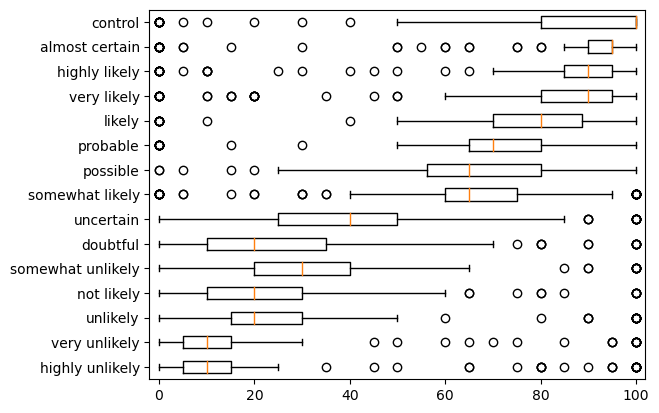

In [10]:
plot_probs(df2, exp_order, None, title='')

In [34]:
s

,firebase_id,uncertainty_expression,index,response
0,1kU8F49rsUPJTwO552cRIzkBfrt1,highly unlikely,4,5
1,1kU8F49rsUPJTwO552cRIzkBfrt1,unlikely,1,5
2,1kU8F49rsUPJTwO552cRIzkBfrt1,uncertain,3,5
3,1kU8F49rsUPJTwO552cRIzkBfrt1,likely,5,95
4,1kU8F49rsUPJTwO552cRIzkBfrt1,highly likely,2,95
...,...,...,...,...
490,yfBLcQ4TdhRSav4xBSQsy9Xn9op1,highly unlikely,1,5
491,yfBLcQ4TdhRSav4xBSQsy9Xn9op1,unlikely,5,20
492,yfBLcQ4TdhRSav4xBSQsy9Xn9op1,uncertain,4,35
493,yfBLcQ4TdhRSav4xBSQsy9Xn9op1,likely,3,80
